# DADOS QUANTITATIVOS DISCRETOS

In [52]:
%matplotlib inline

from pandas.tools.plotting import scatter_matrix
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

tabela = 'dataset/quantitativos/pesos.csv'
#tabela = 'dataset/quantitativos/velocidade_internet.csv'
#tabela = 'dataset/quantitativos/cotacao_dolar.csv'
coluna = 'pesos'
#coluna = 'cotacao'

dataset = pd.read_csv(tabela)
dataset = dataset[coluna]
#data_ordenado = data.sort_values()
#data_ordenado

# Usando pandas para criar a series de numeros
#data = dataset['velocidade']
ordenados = sorted(dataset)
#print(ordenados)
data = pd.Series(ordenados)
#data

# Montando a tabela de distribuição de frequência

#math.ceil arrendonda arredonda para o número inteiro mais próximo em direção ao infinito positivo
tamanho = len(data)
valor_minimo = min(data)
amplitude = data.max() - data.min()
qnt_classe = math.ceil(math.sqrt(tamanho))
#k = 1 + 3.33* (math.log(amplitude,10))
#qnt_classe = math.ceil(1 + 3.33* (math.log(amplitude,10)))

intervalo = round(amplitude / qnt_classe,2)

# Intervalos
inicial = valor_minimo

#Meu Proprio intervalo para recorte dos dados
intervalos = []
for i in range(qnt_classe + 1):
    intervalos.append(inicial)
    inicial+= intervalo

#print(intervalos)
print("Quantidade de classes: " , qnt_classe)
print("Intervalo: ", intervalo)

df = pd.DataFrame(data,columns=['Classes'])

s, bins = pd.cut(pd.Series(df['Classes']), bins = qnt_classe, retbins=True)

# Valores da classe
#print(bins)

ponto_medio = [(a + b) /2 for a,b in zip(bins[:-1], bins[1:])]
#print(ponto_medio)

#lista_interval = list(interval[1:])
#print(lista_interval)

#Agrupando dados para contagem
factor = pd.cut(df['Classes'],bins=qnt_classe)
frequencia = df.groupby(factor)['Classes'].agg(['count'])
#print(frequencia)

#Salvando tabela inicial
frequencia.to_csv('dataset_gerados/tabela_teste2.csv')
dataset_df = pd.read_csv('dataset_gerados/tabela_teste2.csv')

# Calculando a frequencia acumulada
frequencia = dataset_df['count']
dataset_df.rename(columns={'count':'f'}, inplace=True)

# Frequencia relativa
f = sum(frequencia)
dataset_df['f%'] = dataset_df['f'] / f

# Frequencia acumulada
dataset_df['F'] = dataset_df['f'].cumsum ()
#print(dataset_df)

# Calcular a frequencia relativa acumulada
total = sum(frequencia)
dataset_df['F %'] = dataset_df['F'] / total
#dataset_df

# Ponto médio
dataset_df['xi'] = ponto_medio

# Frequencia ponto médio
dataset_df['xi.fi'] = dataset_df['xi'] * dataset_df['f']

# Ponto Médio ao quadrado
dataset_df['xi²'] = dataset_df['xi'] ** 2 

# Frequencia do Ponto Médio ao quadrado
dataset_df['xi².fi'] = dataset_df['xi²'] * dataset_df['f']
# dataset_df['XI².FI'] = dataset_df['XI²'].cumsum ()

new_df = pd.DataFrame(dataset_df)
new_df

#Salvando tabela inicial
new_df.to_csv('dataset_gerados/TOFPC.csv',index=False)
new_df

Quantidade de classes:  11
Intervalo:  8.09


,Classes,f,f%,F,F %,xi,xi.fi,xi²,xi².fi
0,"(22.911, 31.091]",9,0.089109,9,0.089109,27.000955,243.008591,729.051546,6561.463917
1,"(31.091, 39.182]",4,0.039604,13,0.128713,35.136364,140.545455,1234.564050,4938.256198
2,"(39.182, 47.273]",8,0.079208,21,0.207921,43.227273,345.818182,1868.597107,14948.776860
3,"(47.273, 55.364]",6,0.059406,27,0.267327,51.318182,307.909091,2633.555785,15801.334711
4,"(55.364, 63.455]",6,0.059406,33,0.326733,59.409091,356.454545,3529.440083,21176.640496
5,"(63.455, 71.545]",16,0.158416,49,0.485149,67.500000,1080.000000,4556.250000,72900.000000
6,"(71.545, 79.636]",8,0.079208,57,0.564356,75.590909,604.727273,5713.985537,45711.884298
7,"(79.636, 87.727]",7,0.069307,64,0.633663,83.681818,585.772727,7002.646694,49018.526860
8,"(87.727, 95.818]",16,0.158416,80,0.792079,91.772727,1468.363636,8422.233471,134755.735537
9,"(95.818, 103.909]",16,0.158416,96,0.950495,99.863636,1597.818182,9972.745868,159563.933884


# Histograma

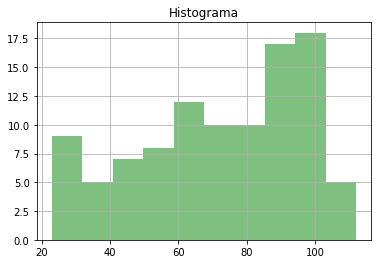

In [2]:
# MATPLOTLIB: Histograma (univariado)
vel_internet = pd.Series(data) # Transformanda os dados em um serie
vel_internet.hist(alpha=0.5, color='Green')
plt.title("Histograma")
plt.show()

# Calculos da Tabela

In [64]:
import math
# Media
f = new_df['f'].sum() 
xi_li = new_df['xi.fi'].sum()
media = xi_li / f

# Moda
index = new_df['f'].idxmax() # Maior valor da coluna de frequencia
moda_tabela = new_df['xi'][index]

# Mediana li + (hi * (Pmq - Fant)/fi)

#amplitude = intervalo
amplitude_classe = intervalo
posicao_mediana = f/2

F = new_df['F']

# Pegando a classe da mediana
def get_position(value):
    position = 0
    for i in F:
        if i <= value:
            position+=1
        else:
            break;
    return position

#classe = get_position(posicao)

def calc_mediana_tabela(valor):
    position = get_position(valor)
    # frequencia da classe
    fi = new_df['f'][position]
    # limite inferior da classe
    li = bins[position]
    # amplitude da classe
    hi = amplitude_classe
    # posicao da mediana
    Pmq = posicao
    # posicao anterior da mediana
    Fant = F[position-1]

    return li + (hi * (Pmq - Fant)/fi)

mediana = calc_mediana_tabela(posicao_mediana)

# Quartis
# q1 = f/4
# q2 = (f/4) * 2
# q3 = (f/4) * 3

# classe = get_position(q1)

# # Montando formula
# fi = new_df['f'][classe]
# li = bins[classe]
# hi = amplitude_classe
# Pmq = q1
# Fant = F[classe-1]

# print(q1)
# print("Posição: ", classe)
# print("Frrequencia: ", fi)
# print("limite inferior: ", li)
# print("amplitude: ", hi)
# print("posição: ", Pmq)
# print("posição anterior: ", Fant)
# quartil1 = li + (hi * (Pmq - Fant)/fi)
# print("1° Quartil: ", quartil1 )

# Variancia
fxi = new_df['xi.fi'].sum()
fixi2 = new_df['xi².fi'].sum()
variancia = (1/ (f-1)) * (fixi2 - ((fxi **2) / f))

# Desvio Padrão
desvio_padrao = math.sqrt(variancia)

# Coeficiente de variação
coeficiente_variacao = (desvio_padrao /  media) * 100

descritiva_tabela = pd.DataFrame({'Medidas': ["Média", "Moda","Mediana","Amplitude",
                                           "1° Quartil","2° Quartil","3° Quartil",
                                           "Variancia","Desvio Padrão","Coeficiente de Variação"],
                        
                       'Resultado': [media, 
                                     moda_tabela,
                                     mediana,
                                     amplitude,                                    
                                     quartil1,
                                     0,
                                     0,
                                     variancia,
                                     desvio_padrao,
                                     coeficiente_variacao,
                                    ]})
descritiva_tabela

,Medidas,Resultado
0,Média,71.982083
1,Moda,67.500000
2,Mediana,73.062330
3,Amplitude,89.000000
4,1° Quartil,53.003144
5,2° Quartil,0.000000
6,3° Quartil,0.000000
7,Variancia,603.240209
8,Desvio Padrão,24.560949
9,Coeficiente de Variação,34.120920


### Calculo de dados brutos

In [5]:
# amplitude, variancia, desvio padrão, coeficiente de variação
import math

# Variancia Populacional
def varianciaPopulacional(data):
    tamanho = len(data)
    media = data.mean()
    soma = 0
    
    for valor in data:
        soma += math.pow( (valor - media ), 2)
     
    return soma / float(tamanho)


# Variancia Amostral
def varianciaAmostral(data):
    tamanho = len(data)
    somaDados = sum(data)

    soma1 = 0
    soma2 = (math.pow(somaDados, 2)) / tamanho
    
    for valor in dataset:
        soma1 += math.pow((valor),2)
        
    return (soma1 - soma2) / float((tamanho - 1))

def desvioPadrao(data):
    return math.sqrt(data)

media = data.mean()
moda = data.mode()

variancia_populacional = varianciaPopulacional(data)
variancia_amostral = varianciaAmostral(data)

desvio_padrao_amostral = desvioPadrao(variancia_populacional)
desvio_padrao_populacional = desvioPadrao(variancia_amostral)

percentil = np.percentile(data,35)

soma = sum(data)
maximo = max(data)
minimo = min(data)
amplitude = maximo - minimo

if(moda.count() % 2 == 0):
    moda = (moda[0] + moda[1])/2

descritiva = pd.DataFrame({'Medidas': ["Mínimo", "Máximo", "Média", 
                                       "Moda", "1° Quartil","2° Quartil",
                                       "3° Quartil","Percentil", "Amplitude",
                                       "Variancia (Amostral)","Variancia (Populacional)","Desvio Padrão(Amostral)",
                                         "Desvio Padrão (Populacional)","Coeficiente de Variação"],
                        
                       'Resultado': [data.min(), 
                                     data.max(),
                                     media,
                                     moda,                                    
                                     data.quantile(q=0.25),
                                     data.quantile(q=0.50),
                                     data.quantile(q=0.75),
                                     percentil,
                                     amplitude,
                                     variancia_amostral,
                                     variancia_populacional,
                                     desvio_padrao_amostral,
                                     desvio_padrao_populacional,
                                     (desvio_padrao_amostral / media) * 100                                                                          
                                    ]})

descritiva
#data.describe()

,Medidas,Resultado
0,Mínimo,23.000000
1,Máximo,112.000000
2,Média,72.326733
3,Moda,69.000000
4,1° Quartil,55.000000
5,2° Quartil,74.000000
6,3° Quartil,93.000000
7,Percentil,66.000000
8,Amplitude,89.000000
9,Variancia (Amostral),605.322178


### Media
A média indica o valor onde estão concetrados os dados de um conjuto de valores, representando um valor
significativo para o mesmo.

### Moda
A moda é o valor que mais se repete dentro de um conjunto

### Mediana
A media é o valor central de um conjunto, ou seja, ela separa a metade superior da metade inferior de uma distribuição

In [96]:
#qnt_filhos_ord = sorted(qnt_filhos)
#centro = tam/2 
#mediana = qnt_filhos_ord[int(centro)] # centro = 8
#print("Mediana: %d " % mediana)
#print("Mediana: %d " % vel_internet.median())

## Medidas de dispersão
São medidas que indicam o quão espalhados estão os dados, ou sua variação. São elas: Amplitude, variância, desvio padrão e desvio absoluto

### Amplitude
#### A = maximo - minimo
A amplitude é a diferença entre o maior e menor valor de um conjunto de dados.

In [12]:
minimo = qnt_acidentes.min()
maximo = qnt_acidentes.max()

print("Máximo: %d Mínimo: %d" % (maximo, minimo) )
print("Amplitude: %d " % (maximo - minimo))

Máximo: 9 Mínimo: 0
Amplitude: 9 


### Variancia 
#### (S²) - Amostral
#### (O²) - Populacional
A variância indica quanto os dados de um conjunto estão afastados de seu valor esperado.

In [8]:
import math

# Variancia Populacional
def varianciaPopulacional(data):
    tamanho = len(data)
    media = data.mean()
    soma = 0
    
    for valor in data:
        soma += math.pow( (valor - media ), 2)
     
    return soma / float(tamanho)


# Variancia Amostral
def varianciaAmostral(data):
    tamanho = len(data)
    somaDados = sum(data)

    soma1 = 0
    soma2 = (math.pow(somaDados, 2)) / tamanho
    
    for valor in dataset:
        soma1 += math.pow((valor),2)
        
    return (soma1 - soma2) / float((tamanho - 1))
    
#print("Variancia Populacional: ", varianciaPopulacional(data1))
print("Variancia Amostral: ", varianciaAmostral(data1)) # 4,75


NameError: name 'data1' is not defined

### Desvio Padrão
É a raiz quadrada da variância

In [11]:
def desvioPadrao(data):
    return math.sqrt(data)

print("Desvio padrão Amostral: ", desvioPadrao(varianciaPopulacional(data1)))
print("Desvio padrão Populacional: ", desvioPadrao(varianciaAmostral(data2)))

NameError: name 'data1' is not defined

### Coeficiente de Variação

In [85]:
print("Populacional: ", (data1.std()/data1.mean())*100)
print("Amostral: ", (data2.std()/data2.mean())*100)

Populacional:  66.35303802690034
Amostral:  47.11241731475677


### Mediana da tabela

m/2 = 40/2 = 20º e 21º

Essas posições estão respectivamente na 4º e 5º classes

#### hi = Li - li 
-> hi - 4 - 3 = 1

h- = Amplitude da classe i
Li = Limite superior na classe i
li = Limite inferior da classe i


hi/li = 1/5 = 0,2

#### PMQ - FANT 
-> 20 - 15 = 5

Pmq = Posição da mediana
Fant = Frequência acumulada anterior

### Para a posição 21º
MQ = lit(0,2) * 5 
-> 3 + 1 = 4
    
#### MQ = li + hi *(PMQ - Fant) / hi

### Para a posição 21º
MQ = 4 + 1 * (21 -20) / 3
MQ = 4 + 1 * 1 / 3
MQ = 4 + 1 / 3

= 4,33


### Quartil - Divide em quatro partes iguais


m/4 = 40/4 = 10º posição(q1)

esta na classe 3º posição

#### 1º Quartil = q1 = li + hi(Pq1 - Fant)/li
2 + 1*(10-7)/8

2+3/8 = 2,38

#### 3º Quartil = q3 = li + hi(Pq3 - Fant)/li
5 + 1 * (30 -23)/13
5 + 7/13
= 5,54


### Percentil
p72
#### m / 100
40/100 = 0,4 * 72 = 28,8 POSIÇÃO
está na 6º classe da tabela

p72 = li + hi(Pq - Fant)/fi

= 5 + 1*(28,8 - 23)/13
= 5+ 5,8/13 = 5,45